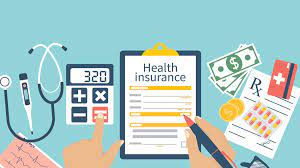

# **Medical Insurance Cost Prediction Model_ANN**

@ Preapred By: Chandan D. Chaudhari

@ Github: https://github.com/chandanc5525

In [1]:
# import data manipulation libraries
import numpy as np
import pandas as pd
# import data visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
# import data logging
import logging
logging.basicConfig(level = logging.INFO,
                    filename = 'MedicalInsuranceCost.log',
                    filemode = 'w',
                    format = '%(asctime)s - %(levelname)s - %(message)s')
# import scikit learn libraries
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import r2_score
# import pickle library
import pickle
# import deep learning libraries
import tensorflow
from keras.models import Sequential
from keras.layers import Dense,Dropout

In [2]:
try:
  url = 'https://raw.githubusercontent.com/chandanc5525/Data-Science-BootCamp/refs/heads/main/Dataset/insurance.csv'
  data = pd.read_csv(url)
  logging.info('Data Connection Successfully Established...')
except:
  logging.warning('Data Connection Failed...')

In [3]:
data.sample(5)

,age,sex,bmi,children,smoker,region,charges
958,43,male,34.960,1,yes,northeast,41034.22140
56,58,female,31.825,2,no,northeast,13607.36875
1022,47,male,36.080,1,yes,southeast,42211.13820
394,46,female,32.300,2,no,northeast,9411.00500
2,28,male,33.000,3,no,southeast,4449.46200


In [4]:
for i in data.columns:
  print(f'Missing Values in {i} :',data[i].isnull().sum())

Missing Values in age : 0
Missing Values in sex : 0
Missing Values in bmi : 0
Missing Values in children : 0
Missing Values in smoker : 0
Missing Values in region : 0
Missing Values in charges : 0


<ipython-input-5-a57c79e55882>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['sex'], ax=ax[0, 0], palette='Set2')
<ipython-input-5-a57c79e55882>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['smoker'], ax=ax[0, 1], palette='Set2')
<ipython-input-5-a57c79e55882>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['region'], ax=ax[0, 2], palette='Set2')


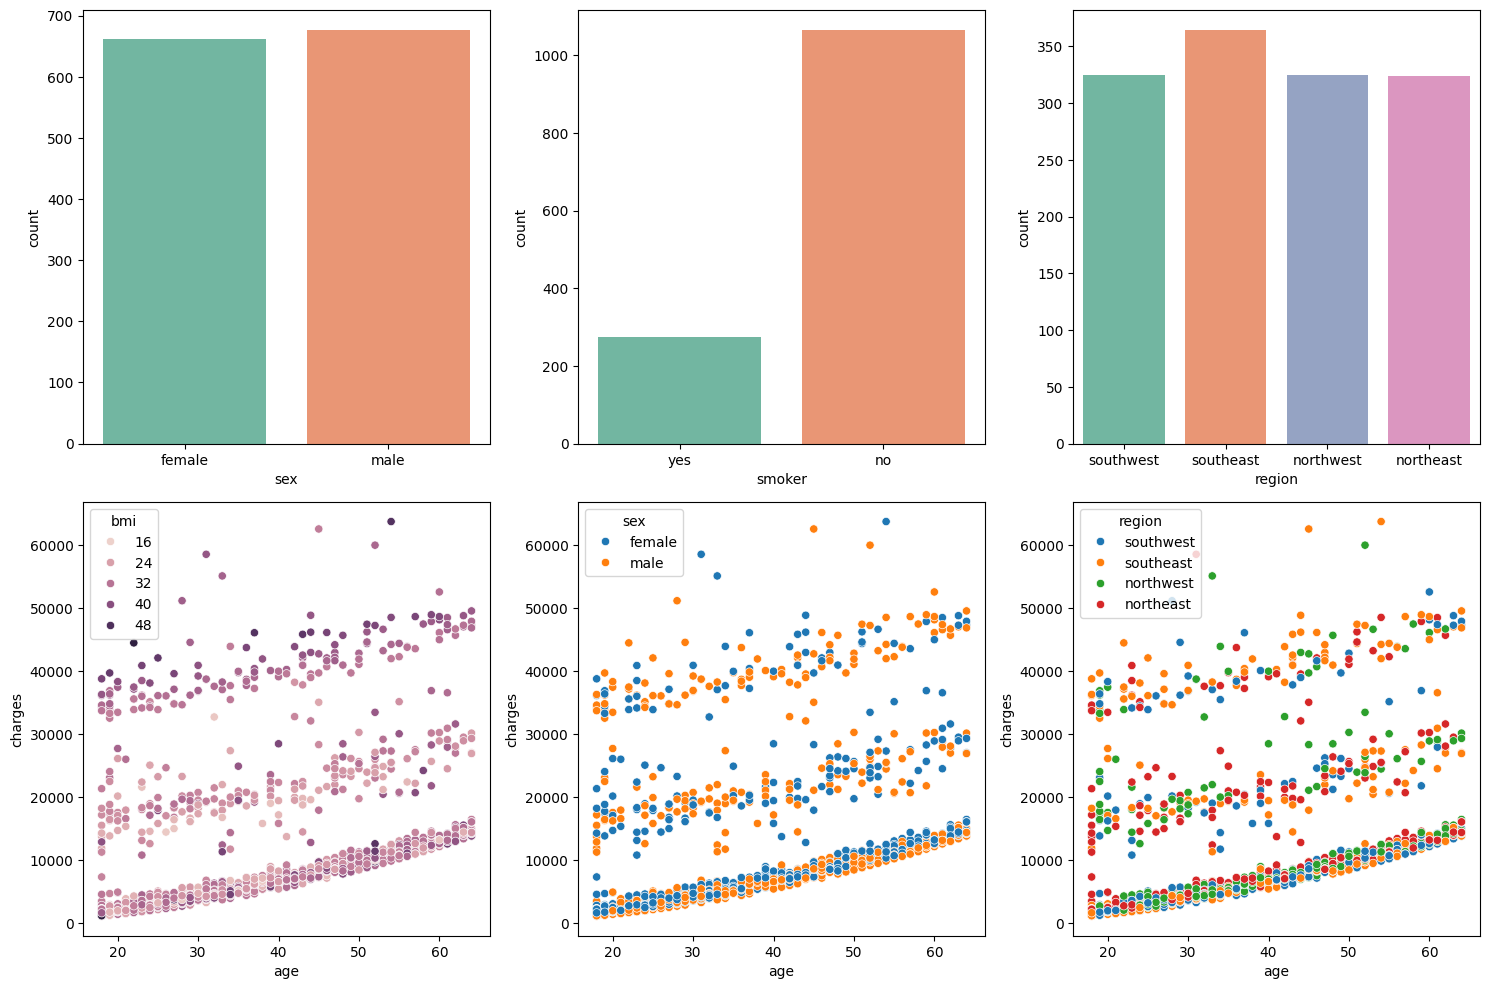

In [5]:
fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(15, 10))

# Count plots
sns.countplot(x=data['sex'], ax=ax[0, 0], palette='Set2')
sns.countplot(x=data['smoker'], ax=ax[0, 1], palette='Set2')
sns.countplot(x=data['region'], ax=ax[0, 2], palette='Set2')

# Scatter plots with hue (no warning here since 'hue' is used)
sns.scatterplot(x=data['age'], hue=data['bmi'], y=data['charges'], ax=ax[1, 0])
sns.scatterplot(x=data['age'], hue=data['sex'], y=data['charges'], ax=ax[1, 1])
sns.scatterplot(x=data['age'], hue=data['region'], y=data['charges'], ax=ax[1, 2])

plt.tight_layout()
plt.show()

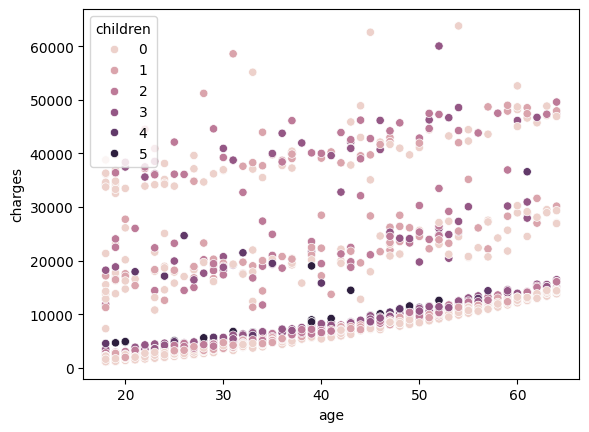

In [6]:
sns.scatterplot(x=data['age'], hue=data['children'], y=data['charges'])
plt.show()

<ipython-input-7-621d96e2ab8f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=data[i],palette = 'Set2')


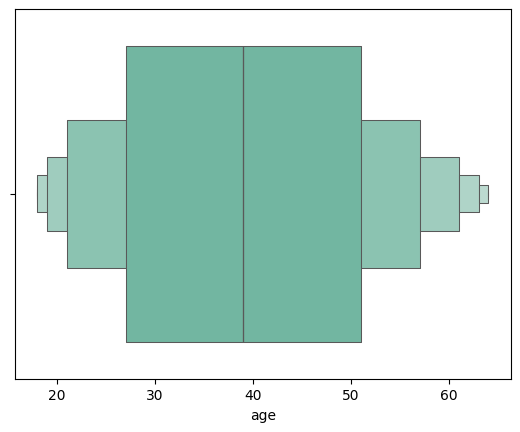

<ipython-input-7-621d96e2ab8f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=data[i],palette = 'Set2')


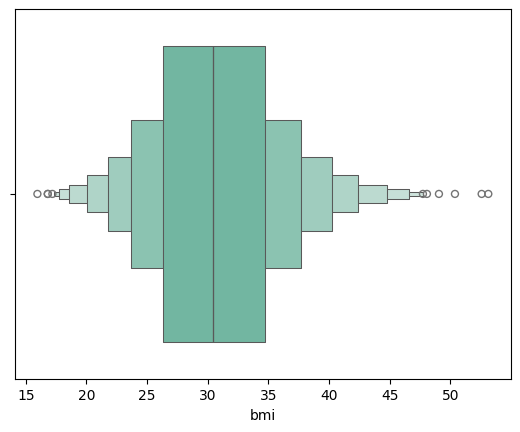

<ipython-input-7-621d96e2ab8f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=data[i],palette = 'Set2')


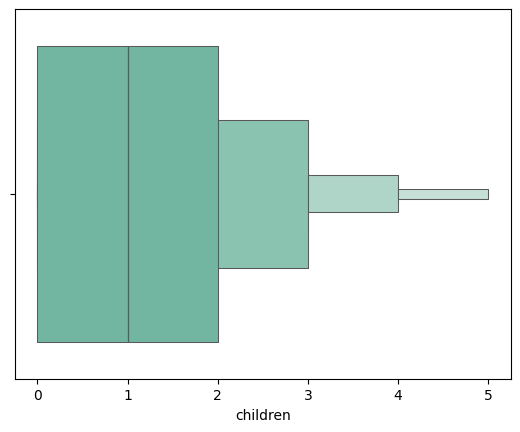

<ipython-input-7-621d96e2ab8f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=data[i],palette = 'Set2')


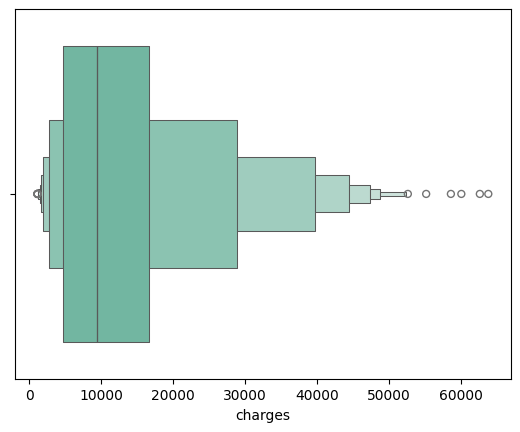

In [7]:
plot = 0

for i in data.columns:
  if data[i].dtypes != 'object':
    sns.boxenplot(x=data[i],palette = 'Set2')

    plot += 1
    plt.show()

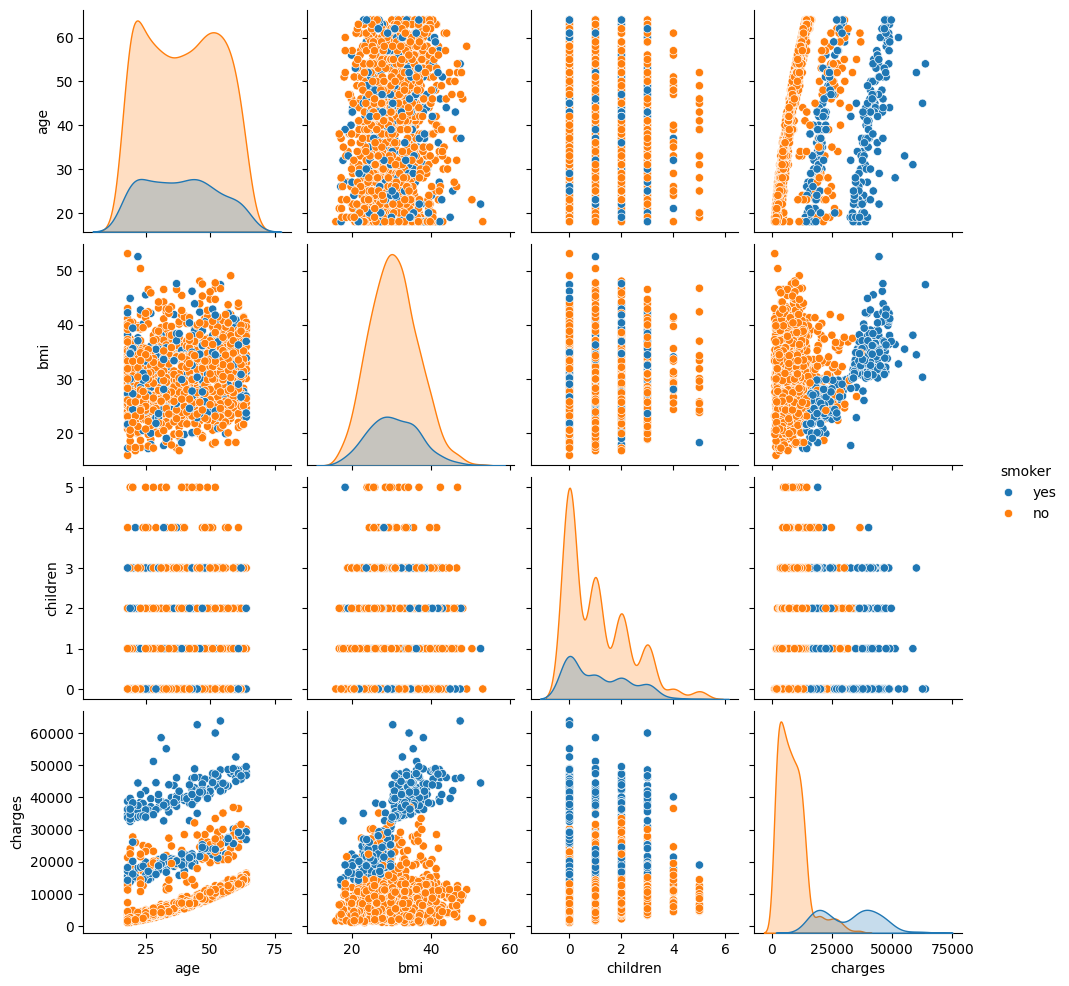

In [8]:
sns.pairplot(data,hue="smoker")
plt.show()

In [9]:
from collections import OrderedDict

stats = []

for i in data.columns:
  if data[i].dtypes != 'object':

    stats_report = OrderedDict({
        'Feature Name' : i,
        'Mean' : round(data[i].mean(),2),
        'Median' : round(data[i].median(),2),
        'Mode' : data[i].mode()[0],
        'Standard Deviation' : round(data[i].std(),2),
        'Variance' : round(data[i].var(),2),
        'Minimum' : round(data[i].min(),2),
        'Maximum' : round(data[i].max(),2),
        'Range' : round(data[i].max() - data[i].min(),2),
        'Skewness' : round(data[i].skew(),2),
        'Kurtosis' : round(data[i].kurtosis(),2),
        'Q1': np.percentile(data[i],25),
        'Q2': np.percentile(data[i],50),
        'Q3': np.percentile(data[i],75),
        'IQR': np.percentile(data[i],75) - np.percentile(data[i],25)
    })
    stats.append(stats_report)

stats_df = pd.DataFrame(stats)
stats_df

,Feature Name,Mean,Median,Mode,Standard Deviation,Variance,Minimum,Maximum,Range,Skewness,Kurtosis,Q1,Q2,Q3,IQR
0,age,39.21,39.00,18.0000,14.05,1.974000e+02,18.00,64.00,46.00,0.06,-1.25,27.00000,39.000,51.000000,24.000000
1,bmi,30.66,30.40,32.3000,6.10,3.719000e+01,15.96,53.13,37.17,0.28,-0.05,26.29625,30.400,34.693750,8.397500
2,children,1.09,1.00,0.0000,1.21,1.450000e+00,0.00,5.00,5.00,0.94,0.20,0.00000,1.000,2.000000,2.000000
3,charges,13270.42,9382.03,1639.5631,12110.01,1.466524e+08,1121.87,63770.43,62648.55,1.52,1.61,4740.28715,9382.033,16639.912515,11899.625365


In [10]:
data = pd.get_dummies(data,columns=['sex','smoker','region'],drop_first=False,dtype = int)
data.sample()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
669,40,29.81,1,6500.2359,1,0,1,0,0,0,1,0


In [11]:
X = data.drop(columns = ['charges'],axis = 1)
y = data['charges']

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 42)

In [13]:
scalar = MinMaxScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [14]:
model = Sequential()

model.add(Dense(units = 110,input_dim = 11))
model.add(Dense(units = 60))
model.add(Dense(units = 50))
model.add(Dense(units = 20))
model.add(Dense(units = 10))
model.add(Dense(units = 1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.compile(optimizer = 'adam',loss = 'mae')
model.fit(X_train,y_train,epochs=300,batch_size =32,validation_data=(X_test,y_test))

Epoch 1/300
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 12893.6582 - val_loss: 12934.6982
Epoch 2/300
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13033.7734 - val_loss: 11334.2148
Epoch 3/300
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10550.2285 - val_loss: 7983.1016
Epoch 4/300
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8080.1377 - val_loss: 7463.5068
Epoch 5/300
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7555.9443 - val_loss: 6983.6157
Epoch 6/300
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6865.6821 - val_loss: 6228.3003
Epoch 7/300
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6106.9106 - val_loss: 4881.4043
Epoch 8/300
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4333.0298 - val_loss: 3522.5933
Epoch 9/300
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3726.7527 - val_loss: 3469.8782
Epoch 10/300
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3738.6460 - val_loss: 3447.2412
Epoch 11/300
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3632.7651 - val_loss: 34

In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 110)                 │           1,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 60)                  │           6,660 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 50)                  │           3,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 20)                  │           1,020 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │             210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 36,815 (143.81 KB)

 Trainable params: 12,271 (47.93 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 24,544 (95.88 KB)

Text(0, 0.5, 'Loss')

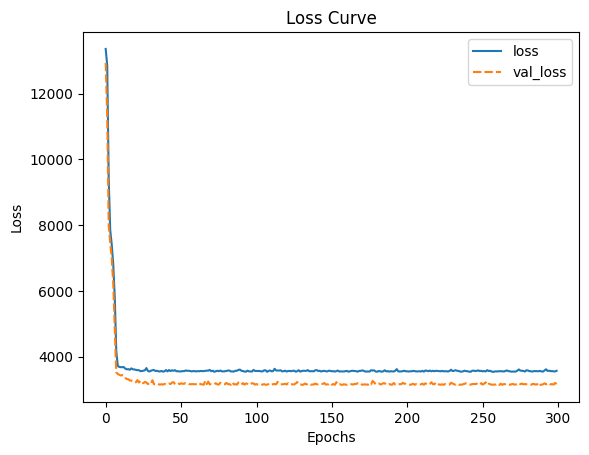

In [17]:
sns.lineplot(model.history.history)
sns.set_style('darkgrid')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


Text(0, 0.5, 'Predicted')

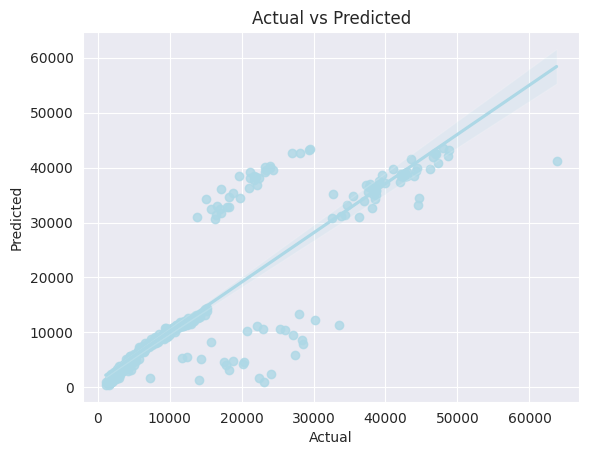

In [18]:
y_pred = model.predict(X_test)
sns.regplot(x=y_test,y=y_pred.flatten(),color = 'lightblue')
plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [19]:
print('R2 Score using ANN : ',r2_score(y_test,y_pred))

R2 Score using ANN :  0.7197985012161751


## **Checking Model Performance Using XGBRegressor**

In [20]:
from xgboost import XGBRegressor

xgb=XGBRegressor()
xgb.fit(X_train,y_train)
xgb_tahmin=xgb.predict(X_test)

In [21]:
from sklearn.metrics import mean_squared_error, r2_score

print("R2 Score Using Xgboost :",r2_score(y_test,xgb_tahmin),
     "Mean Square Error : ", np.sqrt(mean_squared_error(y_test,xgb_tahmin)))

R2 Score Using Xgboost : 0.8316696557372536 Mean Square Error :  4968.029813226282
